In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('train.csv',usecols=['GarageQual','FireplaceQu','SalePrice'])

In [3]:
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


In [5]:
df.isnull().mean()*100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

Text(0, 0.5, 'Number of houses')

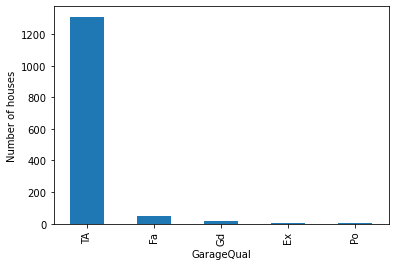

In [6]:
df['GarageQual'].value_counts().sort_values(ascending =False).plot.bar()
plt.xlabel('GarageQual')
plt.ylabel('Number of houses')

In [7]:
df['GarageQual'].mode()

0    TA
dtype: object

Text(0.5, 1.0, 'GarageQual')

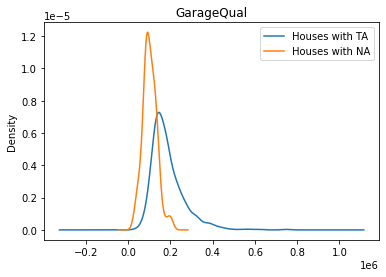

In [16]:
fig , ax = plt.subplots()
df[df['GarageQual']== "TA"]['SalePrice'].plot(kind ='kde',ax=ax)

df[df['GarageQual'].isnull()]['SalePrice'].plot(kind ='kde',ax=ax)

lines, labels =ax.get_legend_handles_labels()
labels = ['Houses with TA','Houses with NA']
ax.legend(lines,labels , loc ='best')

plt.title('GarageQual')

In [18]:
temp= df[df['GarageQual']=='TA']['SalePrice']

In [20]:
df['GarageQual'].fillna('TA',inplace = True)

<AxesSubplot:>

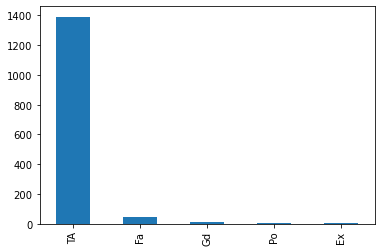

In [21]:
df['GarageQual'].value_counts().plot(kind='bar')

Text(0.5, 1.0, 'GarageQual')

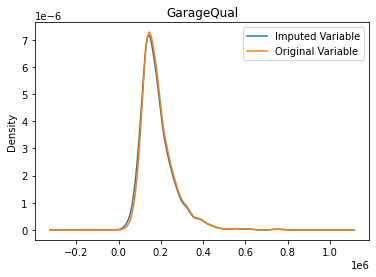

In [24]:
fig , ax = plt.subplots()
df[df['GarageQual']== "TA"]['SalePrice'].plot(kind ='kde',ax=ax)

temp.plot(kind ='kde',ax=ax)

lines, labels =ax.get_legend_handles_labels()
labels = ['Imputed Variable','Original Variable']
ax.legend(lines,labels , loc ='best')

plt.title('GarageQual')

<AxesSubplot:>

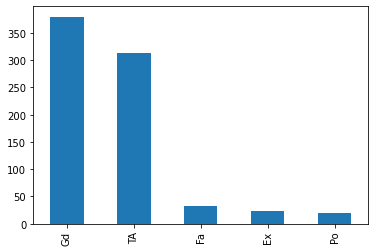

In [25]:
df['FireplaceQu'].value_counts().plot(kind= 'bar')

In [27]:
df['FireplaceQu'].mode()

0    Gd
dtype: object

In [32]:
df['FireplaceQu']

0       NaN
1        TA
2        TA
3        Gd
4        TA
       ... 
1455     TA
1456     TA
1457     Gd
1458    NaN
1459    NaN
Name: FireplaceQu, Length: 1460, dtype: object

In [36]:
df

,FireplaceQu,GarageQual,SalePrice
0,NaN,TA,208500
1,TA,TA,181500
2,TA,TA,223500
3,Gd,TA,140000
4,TA,TA,250000
...,...,...,...
1455,TA,TA,175000
1456,TA,TA,210000
1457,Gd,TA,266500
1458,NaN,TA,142125


Text(0.5, 1.0, 'FireplaceQu')

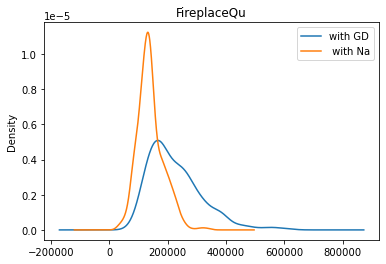

In [37]:
# df[df['FireplaceQu']=='GD']['SalePrice'].plot(kind= 'kde' )


fig = plt.figure()

ax = plt.subplot(111)

df[df['FireplaceQu']== "Gd"]['SalePrice'].plot(kind ='kde',ax=ax)

df[df['FireplaceQu'].isnull()]['SalePrice'].plot(kind= 'kde',ax=ax )


lines, labels =ax.get_legend_handles_labels()
labels = ['with GD',' with Na']
ax.legend(lines,labels , loc ='best')

plt.title('FireplaceQu')

In [38]:
temp = df[df['FireplaceQu']=='Gd']['SalePrice']

In [39]:
df['FireplaceQu'].fillna('Gd',inplace = True)

Text(0.5, 1.0, 'FireplaceQu')

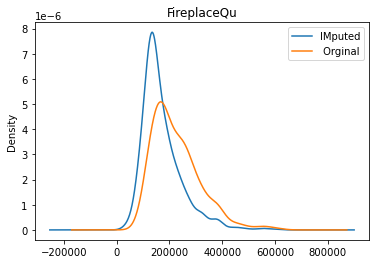

In [40]:

fig = plt.figure()

ax = plt.subplot(111)

df[df['FireplaceQu']=='Gd']['SalePrice'].plot(kind ='kde',ax=ax)

temp.plot(kind= 'kde',ax=ax )


lines, labels =ax.get_legend_handles_labels()
labels = ['IMputed',' Orginal']
ax.legend(lines,labels , loc ='best')

plt.title('FireplaceQu')

<AxesSubplot:>

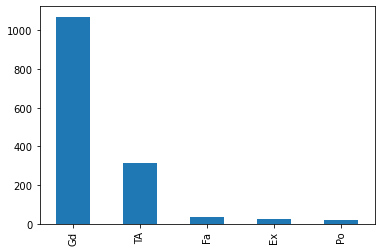

In [41]:
df['FireplaceQu'].value_counts().plot(kind ='bar')

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
df.sample(5)

,FireplaceQu,GarageQual,SalePrice
1378,Gd,TA,83000
1218,Gd,TA,80500
362,Ex,TA,198500
322,TA,TA,301000
593,Gd,TA,140000


In [44]:
X_train,X_test,y_train,y_test = train_test_split(df.drop(columns = ['SalePrice']),df['SalePrice'],test_size=0.2)

In [45]:
from sklearn.impute import SimpleImputer

In [46]:
si = SimpleImputer(strategy='most_frequent')

In [47]:
X_train = si.fit_transform(X_train)
X_test = si.transform(X_test)

In [49]:
si.statistics_

array(['Gd', 'TA'], dtype=object)